# Poisson solution with FFT

## General Problem

As a subroutine for the main algorithm. We need the ability to solve Poisson differential equations. In other words, equations of the form

$$
\begin{align*}
\Delta \phi(x, y, z) &= f(x, y, z), \forall (x, y, z) \in [0, L_x] \times [0, L_y] \times [0, L_z] \\
\phi (0, y) &= \phi (L_x, y), \phi (x, 0) = \phi (x, L_y) \\
\phi_x (0, y) &= \phi_x (L_x, y), \phi_y (x, 0) = \phi_y (x, L_y) \\
\end{align*}
$$,

a Poisson equation with periodic boundary constraints.  
To simplify the problem without much loss for generality, we set $L_x = L_y = L_z = 1$. Therefore, the domain $\Omega = [0, 1]^3$.  
However, due to the periodic boundary conditions on the solution $\phi$, the domain is more precisely the 3-torus, $\mathbb{T}^3 = \Omega$.

## Specific example problem

The specific example problem we solve to ensure our solver works correctly is defined by setting $f(x, y, z) = \cos (2  \pi x) + \sin(2\pi y) + \sin(2\pi z)\cos(2\pi x)$

### Solution

The textbook way of solving these types of differential equations is to consider a Fourier series expansion forms of the functions $\phi$ and $f$.

### Discretization

However, as we're dealing with discrete data points, we only have access to the function values at specific points. 



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
L = 1
N = 101
x, y, z = np.linspace(0, L, N), np.linspace(0, L, N), np.linspace(0, L, N)
grid = np.meshgrid(x, y, z)
X, Y, Z = grid

In [3]:
points = np.asarray([[[[x, y, z] for x in x] for y in y] for z in z])
points.shape

(101, 101, 101, 3)

In [4]:
def RHS(X, Y, Z):
    return np.cos(2 * np.pi * X ** 2) + np.sin(2*np.pi*Y) + np.sin(2*Z*np.pi) * np.cos(2 * np.pi * X)
f = RHS(X, Y, Z)

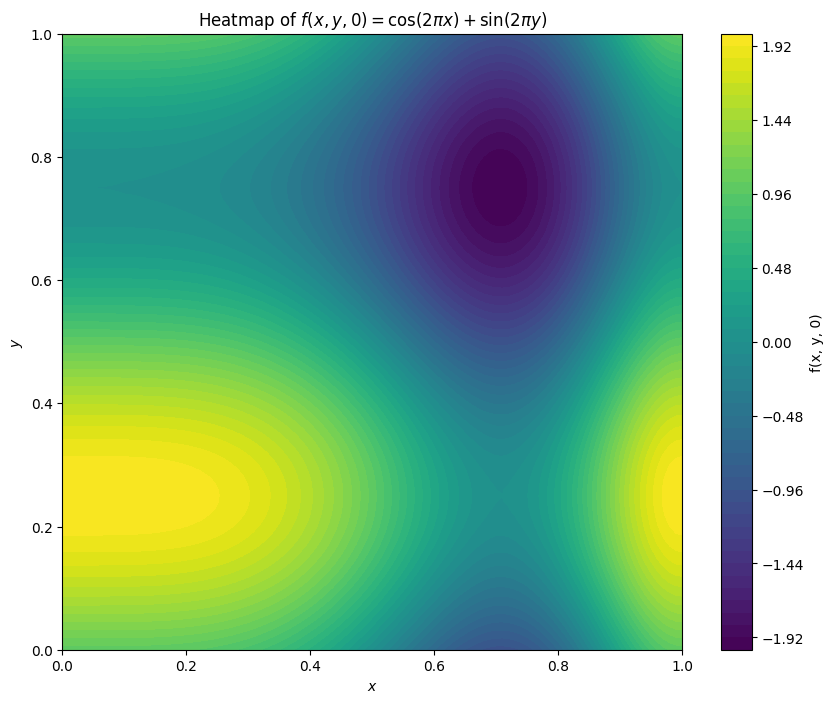

In [5]:
# Create the heightmap plot
fig = plt.subplots(1, 1, figsize=(10, 8))
plt.contourf(X[:, :, 0], Y[:, :, 0], f[:, :, 0], levels=50, cmap='viridis')
plt.colorbar(label='f(x, y, 0)')
plt.title('Heatmap of $f(x, y, 0) = \cos (2  \pi x) + \sin(2\pi y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The above plot shows the values of function $f$ on the domain $\Omega' = \pi_z(\Omega)$ which is the projection of the original domain $\Omega$ to the $xy$-plane.

## Solution



In [12]:
f_hat = np.fft.fftn(f)
f_hat.shape

(101, 101, 101)

In [13]:
# Calculate how many frequencies are needed for each dimension:
k_x = np.fft.fftfreq(N, d=1/N) * 2 * np.pi
k_y = np.fft.fftfreq(N, d=1/N) * 2 * np.pi
k_z = np.fft.fftfreq(N, d=1/N) * 2 * np.pi

array([   0.        ,    6.28318531,   12.56637061,   18.84955592,
         25.13274123,   31.41592654,   37.69911184,   43.98229715,
         50.26548246,   56.54866776,   62.83185307,   69.11503838,
         75.39822369,   81.68140899,   87.9645943 ,   94.24777961,
        100.53096491,  106.81415022,  113.09733553,  119.38052084,
        125.66370614,  131.94689145,  138.23007676,  144.51326207,
        150.79644737,  157.07963268,  163.36281799,  169.64600329,
        175.9291886 ,  182.21237391,  188.49555922,  194.77874452,
        201.06192983,  207.34511514,  213.62830044,  219.91148575,
        226.19467106,  232.47785637,  238.76104167,  245.04422698,
        251.32741229,  257.61059759,  263.8937829 ,  270.17696821,
        276.46015352,  282.74333882,  289.02652413,  295.30970944,
        301.59289474,  307.87608005,  314.15926536, -314.15926536,
       -307.87608005, -301.59289474, -295.30970944, -289.02652413,
       -282.74333882, -276.46015352, -270.17696821, -263.89378